1.	Survival = Survival (0 = No, 1 = Yes)
2.	Pclass = Ticket Class
3.	Sex = Sex
4.	Age = Age in years
5.	Sibsp = # of siblings / spouses aboard the Titanic
6.	Parch = # of parents / children aboard the Titanic
7.	Ticket = Ticket number
8.	Fare = Passenger fare
9.	Cabin = Cabin number
10.	Embarked = Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
11.	PassangerId = unique value
12.	Name = Name

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [6]:
df.drop(columns=['PassengerId', 'Name','Cabin','Ticket'],inplace=True)

In [7]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [8]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [9]:
df['Age']=df['Age'].round()

In [10]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [11]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Variabel kategorikal:
1. Pclass
2. Sex
3. Embarked
4. Survived (Output)


variabel kontinu:
1. Age
2. SibSp
3. Parch
4. Fare

# Univariate

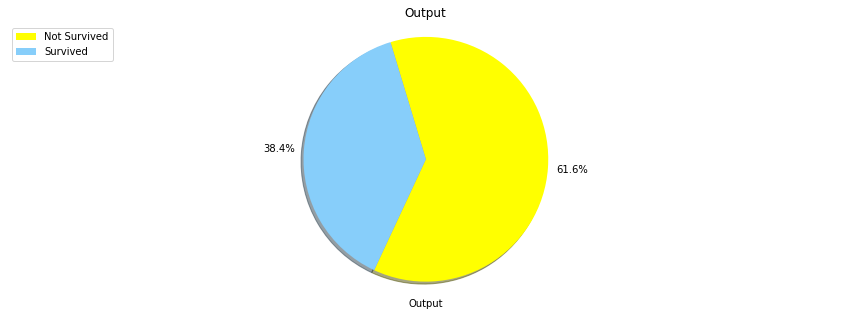

In [12]:
df_output = df['Survived'].value_counts()
df_output.plot(kind='pie',
                 figsize=(15,5),
                 autopct='%1.1f%%',
                 startangle=245,           
                 shadow=True,
                 labels=None,                
                 pctdistance=1.2,
                 colors = ['yellow','lightskyblue'])
plt.title('Output')
plt.ylabel('')
plt.xlabel('Output')
plt.axis('equal')
plt.legend(["Not Survived", "Survived"], loc='upper left')
plt.show()

# Kesimpulan:
   Jumlah penumpang yang bertahan lebih sedikit dari penumpang yang tidak bertahan

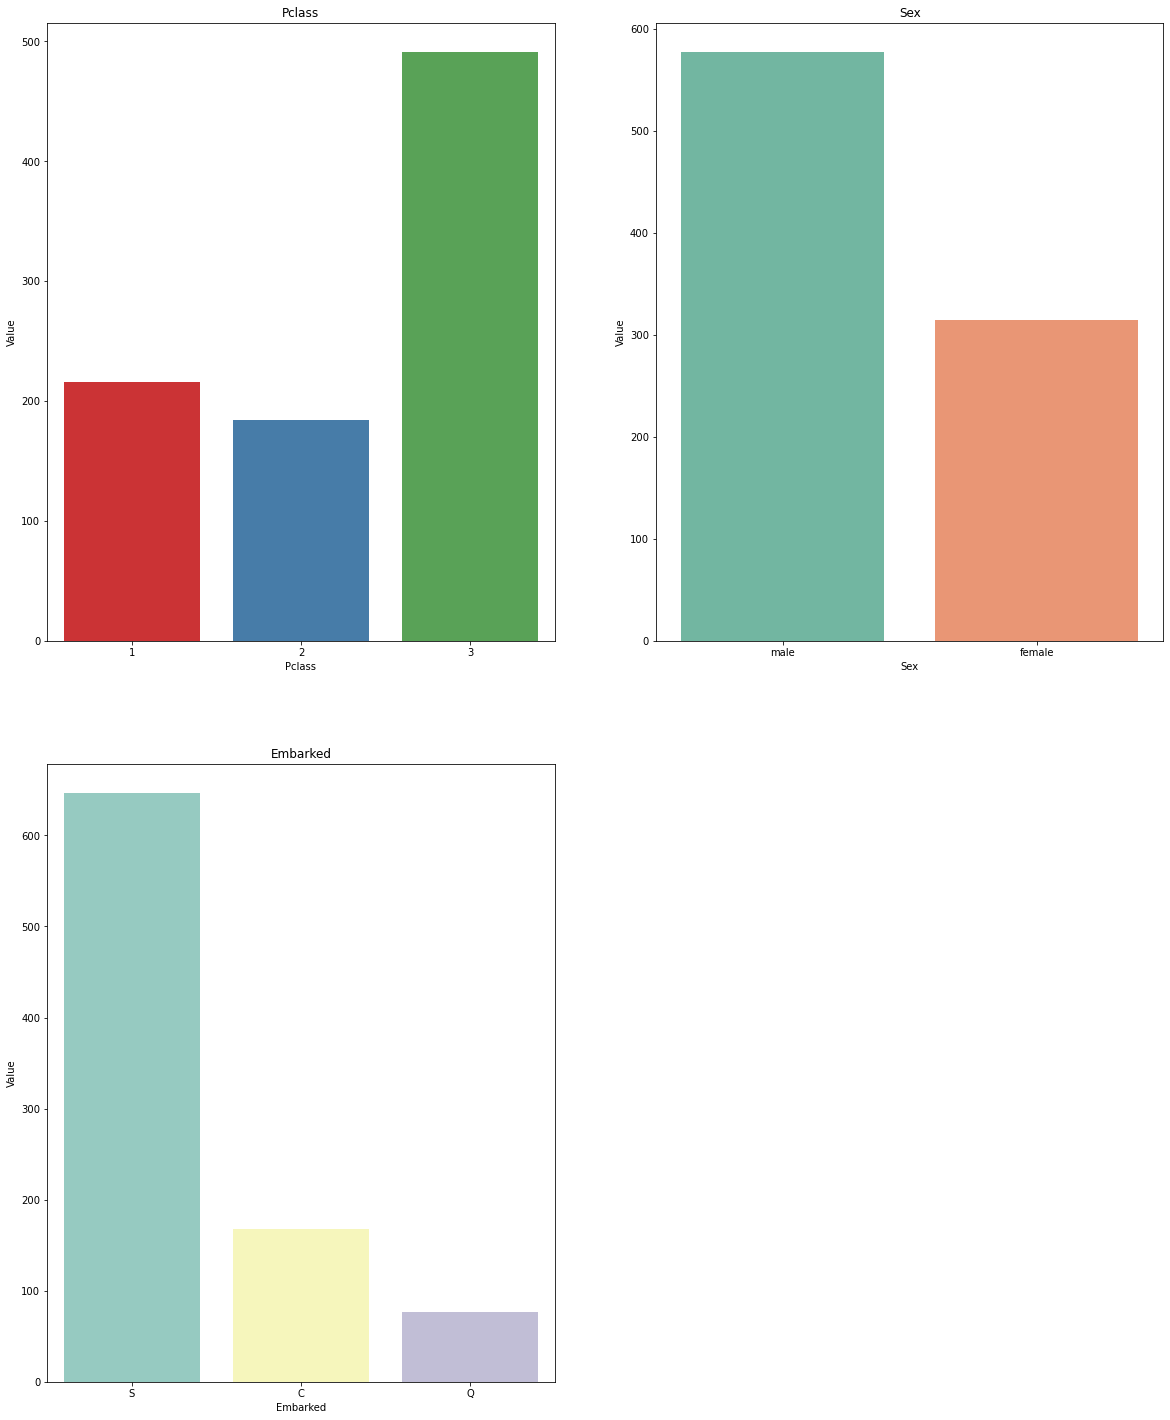

In [13]:
fig = plt.figure(figsize = (20,25))
ax0= fig.add_subplot(2,2,1)
ax1= fig.add_subplot(2,2,2)
ax2= fig.add_subplot(2,2,3)

sns.countplot(x = 'Pclass',data=df,palette = 'Set1',ax=ax0)
ax0.set_title('Pclass')
ax0.set_xlabel('Pclass')
ax0.set_ylabel('Value')

sns.countplot(x = 'Sex',data=df,palette = 'Set2',ax=ax1)
ax1.set_title('Sex')
ax1.set_xlabel('Sex')
ax1.set_ylabel('Value')

sns.countplot(x = 'Embarked',data=df,palette = 'Set3',ax=ax2)
ax2.set_title('Embarked')
ax2.set_xlabel('Embarked')
ax2.set_ylabel('Value')

plt.show()

# Kesimpulan:
1. Lebih banyak penumpang yang berada di 3rd class
2. Penumpang laki-laki lebih banyak dari pada penumpang perempuan
3. Penumpang paling banyak berasal dari pelabuhan Southampton

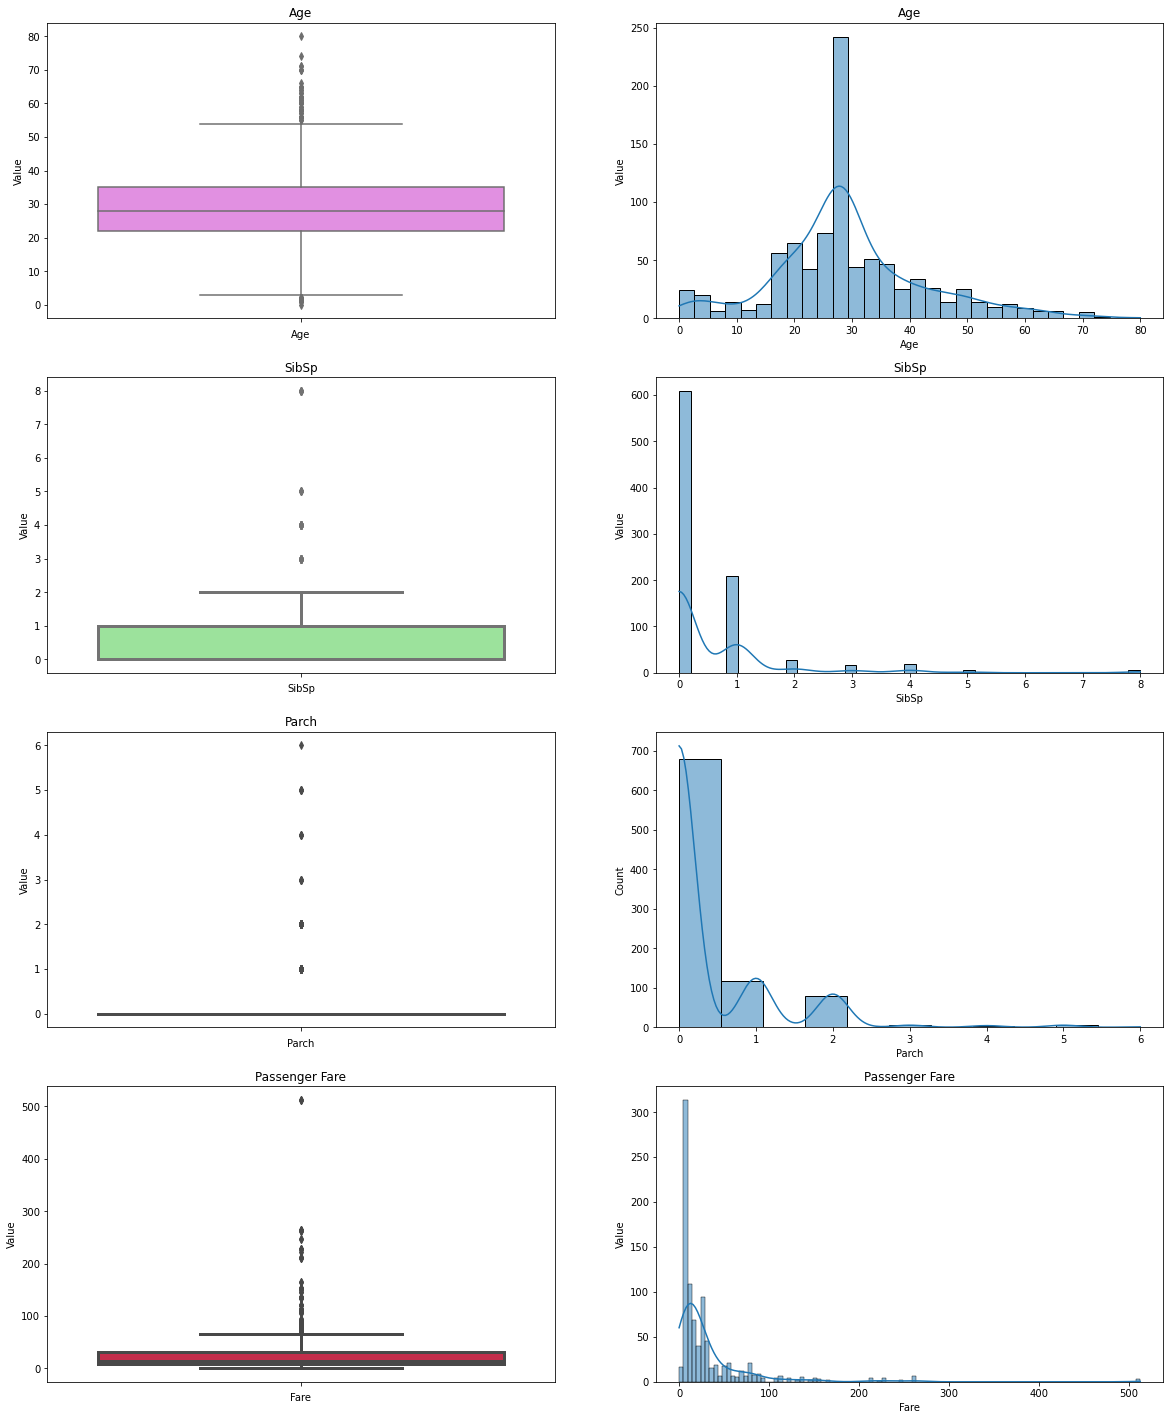

In [14]:
fig = plt.figure(figsize = (20,25))
ax0= fig.add_subplot(4,2,1)
ax1= fig.add_subplot(4,2,2)
ax2= fig.add_subplot(4,2,3)
ax3= fig.add_subplot(4,2,4)
ax4= fig.add_subplot(4,2,5)
ax5= fig.add_subplot(4,2,6)
ax6= fig.add_subplot(4,2,7)
ax7= fig.add_subplot(4,2,8)

sns.boxplot(y = df['Age'], color = 'violet',ax=ax0)
ax0.set_title('Age')
ax0.set_xlabel('Age')
ax0.set_ylabel('Value')

sns.histplot(data=df,x='Age',kde=True,ax=ax1)
ax1.set_title('Age')
ax1.set_xlabel('Age')
ax1.set_ylabel('Value')

sns.boxplot(y = df['SibSp'], color = 'lightgreen',linewidth=3,ax=ax2)
ax2.set_title('SibSp')
ax2.set_xlabel('SibSp')
ax2.set_ylabel('Value')

sns.histplot(data=df,x='SibSp',kde=True,ax=ax3)
ax3.set_title('SibSp')
ax3.set_xlabel('SibSp')
ax3.set_ylabel('Value')

sns.boxplot(y=df['Parch'], color='cyan', linewidth=3, ax=ax4)
ax4.set_title('Parch')
ax4.set_xlabel('Parch')
ax4.set_ylabel('Value')

sns.histplot(data=df,x='Parch',kde=True,ax=ax5)
ax4.set_title('Parch')
ax4.set_xlabel('Parch')
ax4.set_ylabel('Value')

sns.boxplot(y=df['Fare'], color='crimson', linewidth=3, ax=ax6)
ax6.set_title('Passenger Fare')
ax6.set_xlabel('Fare')
ax6.set_ylabel('Value')

sns.histplot(data=df,x='Fare',kde=True,ax=ax7)
ax7.set_title('Passenger Fare')
ax7.set_xlabel('Fare')
ax7.set_ylabel('Value')

plt.show()

# Kesimpulan:
1. Mayoritas penumpang berusia 20-30an tahun.
2. Kebanyakan penumpang hanya datang sendiri ato berdua(bersama pasangan atau saudara).
3. Banyak penumpang yang datang tanpa membawa anak.
4. Tiket yang dibeli sebagian besar harganya di bawah $50

# Bivariate

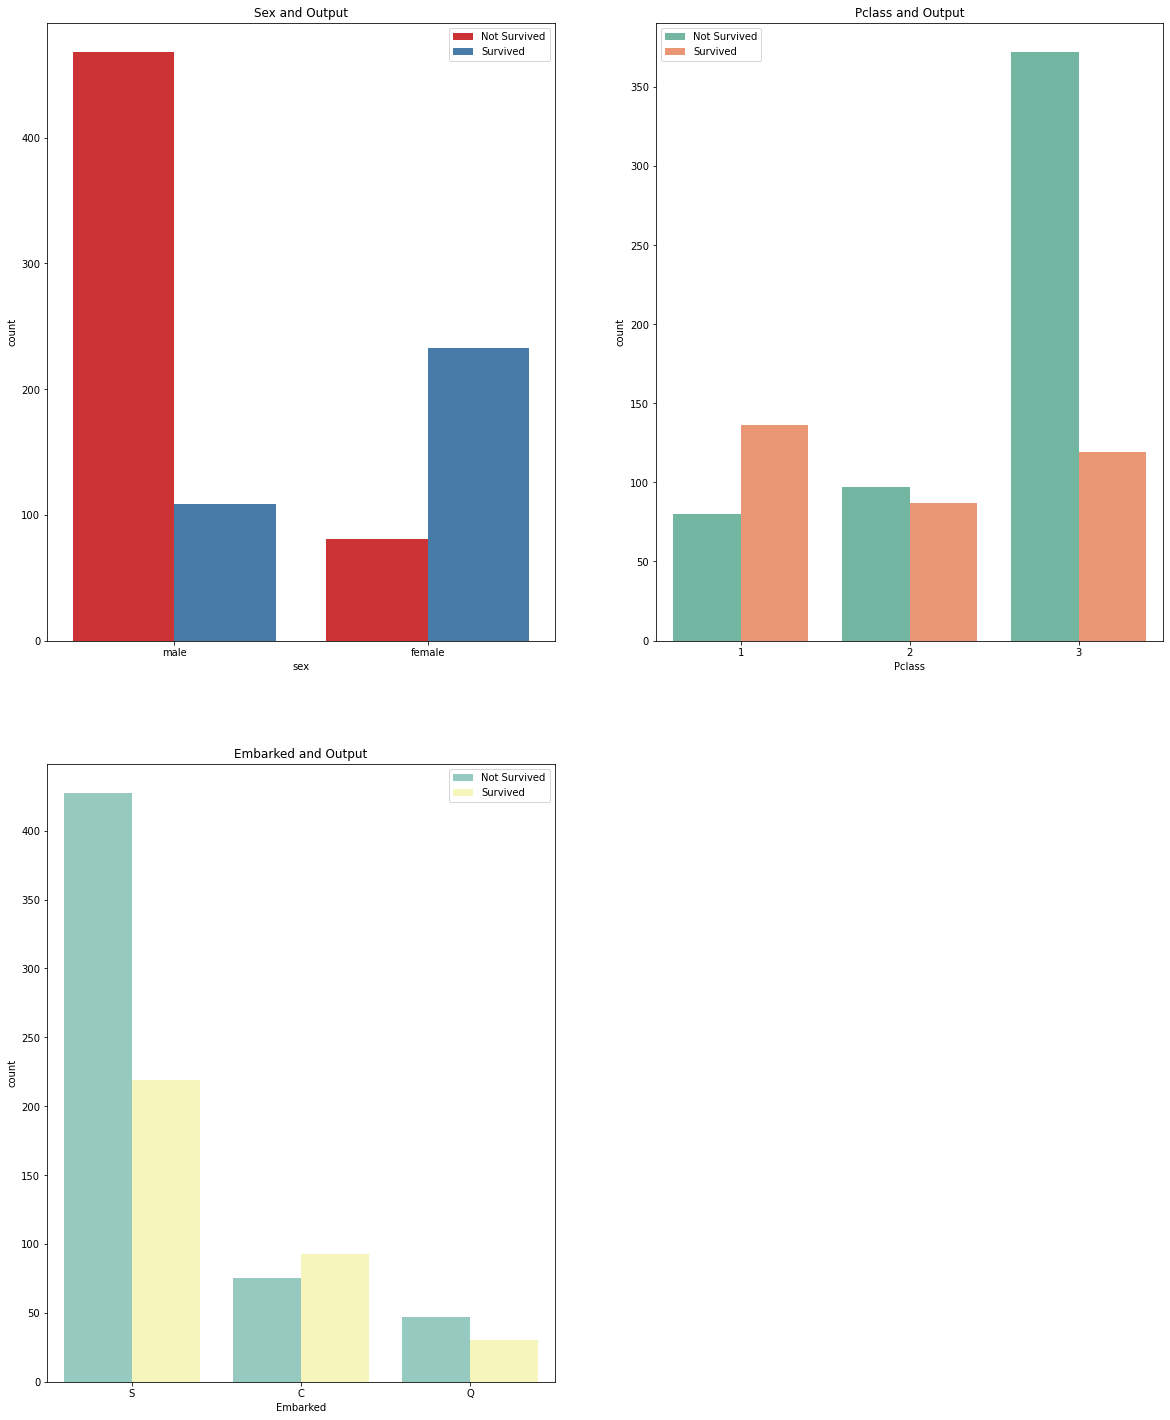

In [15]:
fig = plt.figure(figsize = (20,25))
ax0= fig.add_subplot(2,2,1)
ax1= fig.add_subplot(2,2,2)
ax2= fig.add_subplot(2,2,3)

sns.countplot(data = df, x = 'Sex', hue = 'Survived', palette = 'Set1', fill = True, ax = ax0)
ax0.set_title('Sex and Output')
ax0.set_xlabel('sex')
ax0.legend(["Not Survived", "Survived"])

sns.countplot(data = df, x = 'Pclass', hue = 'Survived', palette = 'Set2', fill = True, ax = ax1)
ax1.set_title('Pclass and Output')
ax1.set_xlabel('Pclass')
ax1.legend(["Not Survived", "Survived"])

sns.countplot(data = df, x = 'Embarked', hue = 'Survived', palette = 'Set3', fill = True, ax = ax2)
ax2.set_title('Embarked and Output')
ax2.set_xlabel('Embarked')
ax2.legend(["Not Survived", "Survived"])


plt.show()

# Kesimpulan:
1. Penumpang perempuan lebih banyak yang survived, dan penumpang laki-laki lebih banyak yang tidak survived.
2. Penumpang yang berada di First class lebih banyak yang survived.
3. Penumpang yang berasal dari pelabuhan Cherbourg lebih banyak yang survived.

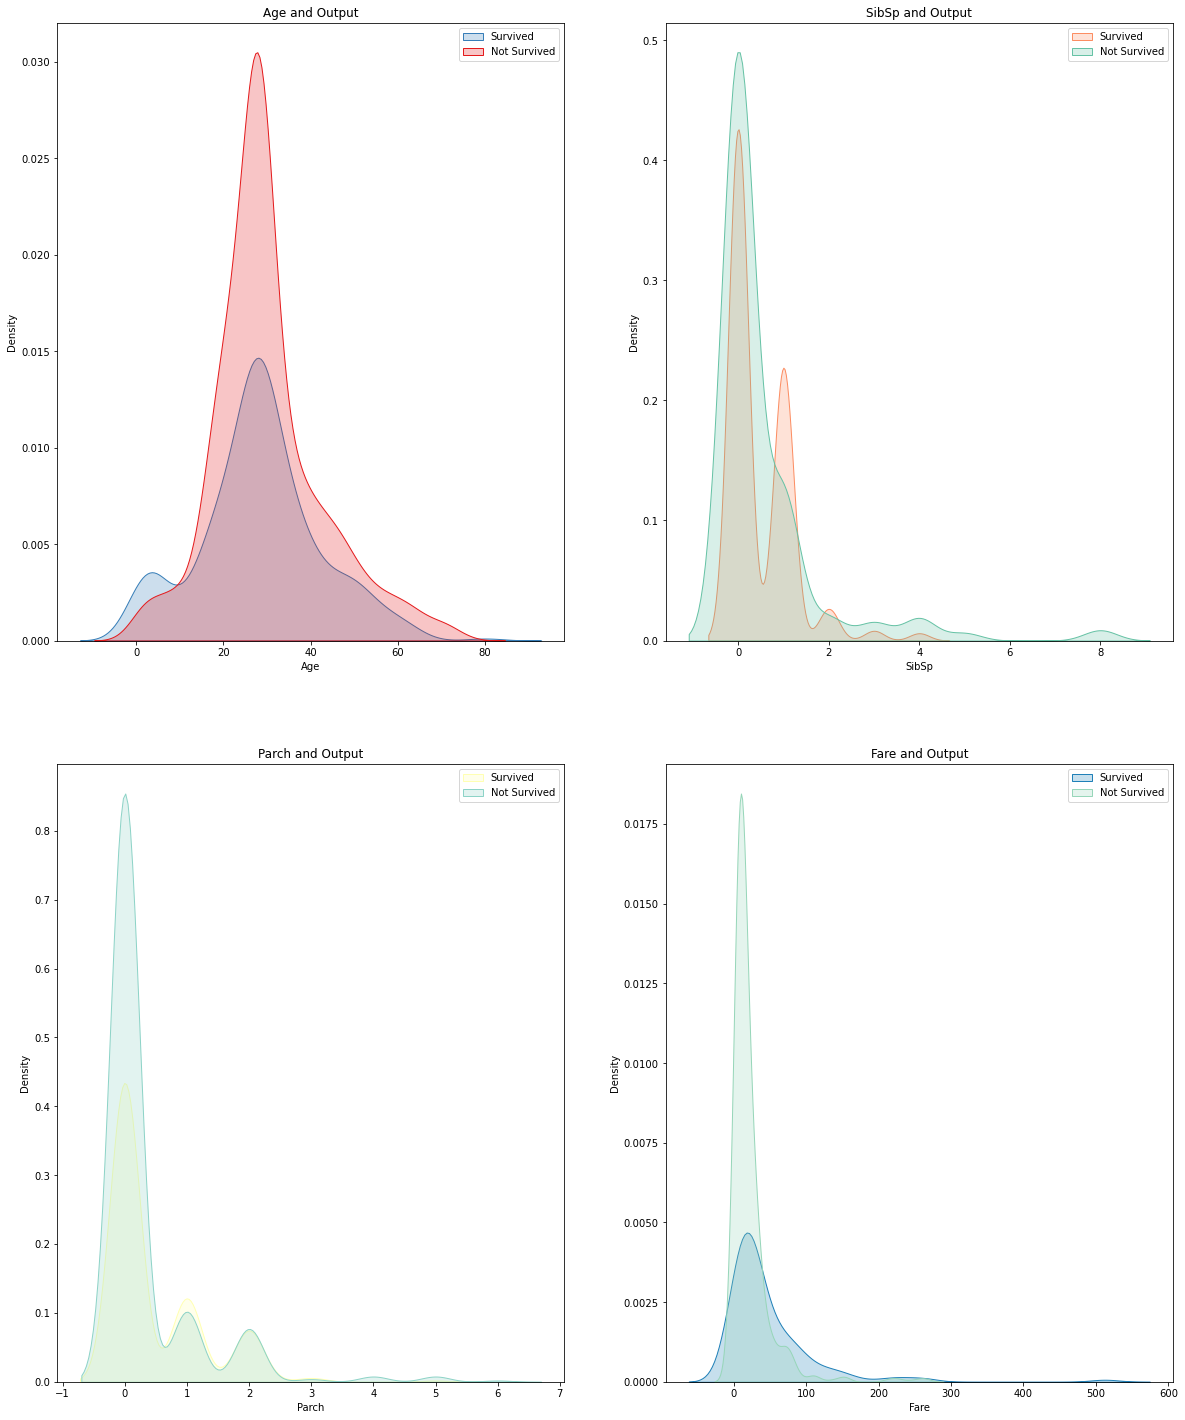

In [16]:
fig = plt.figure(figsize = (20,25))
ax0= fig.add_subplot(2,2,1)
ax1= fig.add_subplot(2,2,2)
ax2= fig.add_subplot(2,2,3)
ax3= fig.add_subplot(2,2,4)

sns.kdeplot(data = df, x = 'Age', hue = 'Survived', palette = 'Set1', fill = True, ax = ax0)
ax0.set_title('Age and Output')
ax0.set_xlabel('Age')
ax0.legend(["Survived","Not Survived"])

sns.kdeplot(data = df, x = 'SibSp', hue = 'Survived', palette = 'Set2', fill = True, ax = ax1)
ax1.set_title('SibSp and Output')
ax1.set_xlabel('SibSp')
ax1.legend(["Survived","Not Survived"])

sns.kdeplot(data = df, x = 'Parch', hue = 'Survived', palette = 'Set3', fill = True, ax = ax2)
ax2.set_title('Parch and Output')
ax2.set_xlabel('Parch')
ax2.legend(["Survived","Not Survived"])

sns.kdeplot(data = df, x = 'Fare', hue = 'Survived', palette = 'YlGnBu', fill = True, ax = ax3)
ax3.set_title('Fare and Output')
ax3.set_xlabel('Fare')
ax3.legend(["Survived","Not Survived"])

plt.show()

# Kesimpulan:
Age, SibSp, Parch, dan Fare tidak terlalu berpengaruhi untuk menentukan besar atau kecilnya peluang penumpang dapat survived atau tidak.

# Mulitvariate

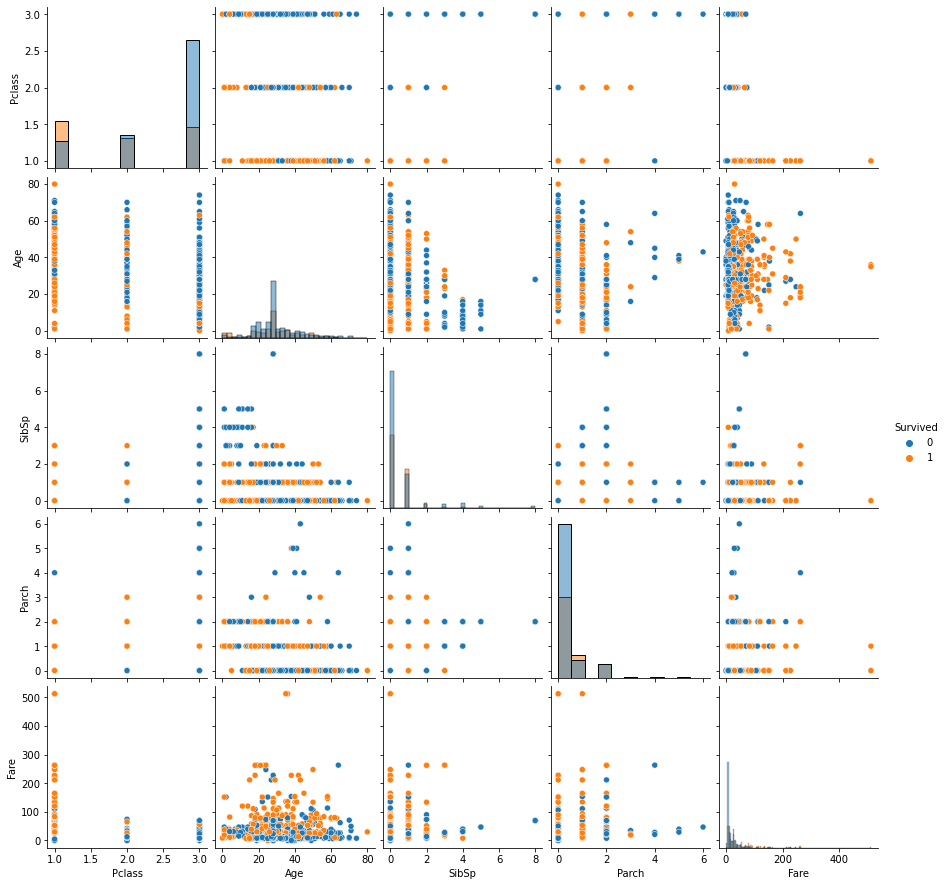

In [17]:
sns.pairplot(df, hue="Survived", diag_kind="hist")
plt.show()

# Kesimpulan Akhir:
1. Jumlah penumpang yang bertahan lebih sedikit dari penumpang yang tidak bertahan.
2. Penumpang laki-laki lebih banyak dari pada penumpang perempuan.
3. Penumpang perempuan lebih banyak yang survived, dan penumpang laki-laki lebih banyak yang tidak survived. Kemungkinan: Penumpang laki-laki menolong penumpang perempuan
4. Penumpang yang berada di first class lebih banyak yang survived. Kemungkinan: Penumpang yang berada di first class lebih diprioritaskan

# Data Preprocessing

In [18]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

In [19]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [20]:
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = df['Survived']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model

In [ ]:
logistic_regression = LogisticRegression().fit(X_train, y_train)

In [23]:
y_pred = logistic_regression.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Accuracy Score: 0.8134328358208955


# Evaluasi Model

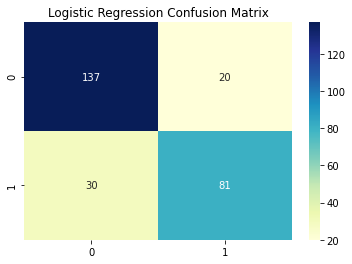

In [24]:
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm,annot=True, fmt="d", cmap="YlGnBu").set_title("Logistic Regression Confusion Matrix")

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       157
           1       0.80      0.73      0.76       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268

